# Unit 2 Homework - Bikeshare 

_Author: Theresa Waters_

- Description: This dataset counts hourly bike rentals throughout a city over the course of 2 years.  It contains around 10,000 samples that logs information about the weather at that point in time, as well as the date.

- Questions that could be answered: How do time based characteristics like time of day and previously occurring trends impact the ability to forecast total rentals?  What about weather?  This dataset is primarily about being able to accurately capture the impact of time on your target variable.

## Imports

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline

In [6]:
bike = pd.read_csv('data/bikeshare.csv')

## Explore the dataset

In [7]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  object 
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  object 
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   count       10886 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 850.6+ KB


In [60]:
bike.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,Spring,0,0,Clear Skies,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,1


In [18]:
bike.shape

(10886, 10)

In [27]:
bike.dtypes

datetime       object
season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
count           int64
dtype: object

In [25]:
bike['season'].value_counts()

Winter    2734
Summer    2733
Fall      2733
Spring    2686
Name: season, dtype: int64

In [28]:
bike['weather'].value_counts()

Clear Skies          7192
Partly Cloudy        2834
Light Storms/Rain     859
Heavy Storms/Rain       1
Name: weather, dtype: int64

In [34]:
#Change datetime to proper datatype 

bike['datetime'] = pd.to_datetime(bike['datetime'])



In [35]:
bike.dtypes

datetime      datetime64[ns]
season                object
holiday                int64
workingday             int64
weather               object
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                  int64
dtype: object

## Clean

In [12]:
#check for missing values - NONE 

bike.isnull().sum() 

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

## Build models

In [19]:
X = bike.drop('count', axis = 1) #looking at everything except the count (this is the target)
y = bike['count'] #what I will be predicting 

In [21]:
X.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-01 00:00:00,Spring,0,0,Clear Skies,9.84,14.395,81,0.0
1,2011-01-01 01:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0
2,2011-01-01 02:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0
3,2011-01-01 03:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0
4,2011-01-01 04:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0


In [22]:
X.shape #2D 

(10886, 9)

In [23]:
y.shape #1D 

(10886,)

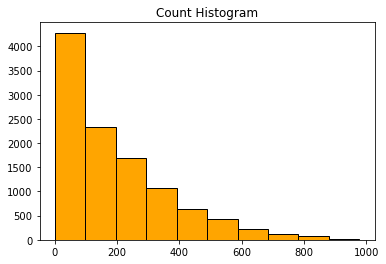

In [33]:
#Looking for outliers in count data - no major outliers 

plt.hist(y, color = "orange", edgecolor = 'black')
plt.title('Count Histogram');

#### Linear Model

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

- Heatmap correlation

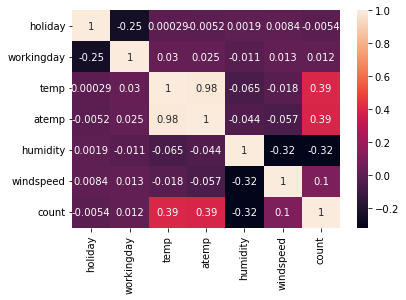

In [39]:
sns.heatmap(bike.corr(), annot = True);

#looks like temperature and "feels like" temperature have the strongest correlation with number of bikes checked out per hour


- Pairplot

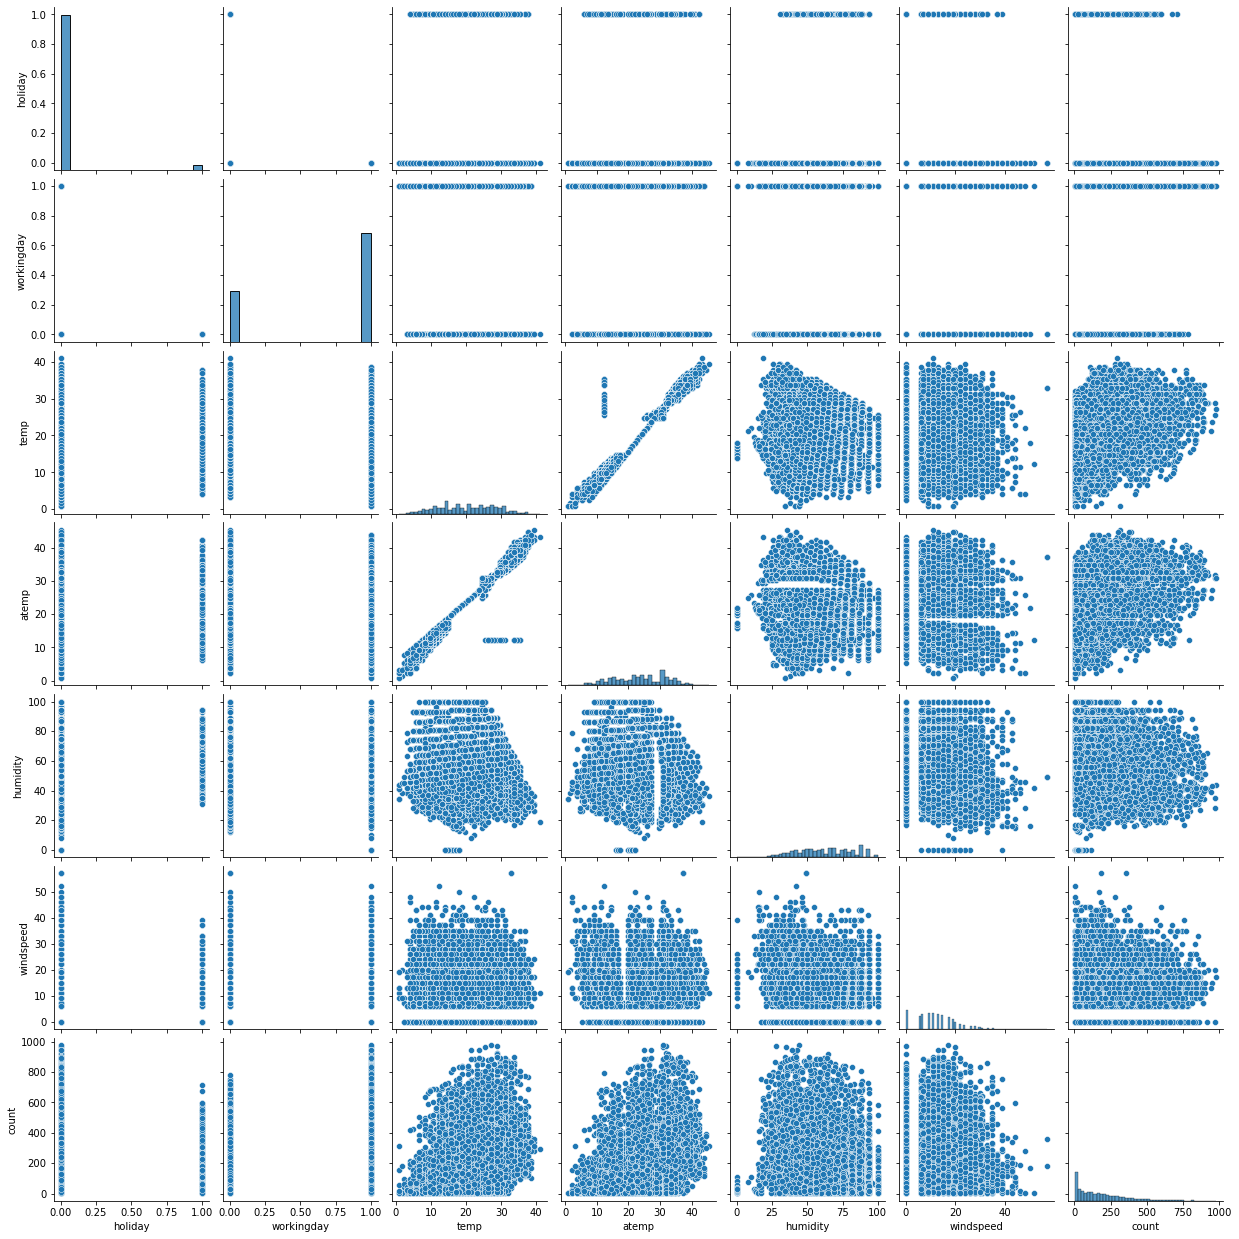

In [40]:
sns.pairplot(bike)

#do see the correlation between temp and atemp with count 
#not getting the full picture with holiday and working day - need the logistic function 

- Logistic function for binary values - holiday and workingday


In [50]:
b_sort = bike.sort_values(by = 'count')
holiday = b_sort.loc[b_sort['holiday'] == 1]
non_holiday = b_sort.loc[b_sort['holiday'] == 0]


In [ ]:
num_defaults = b_sort['']

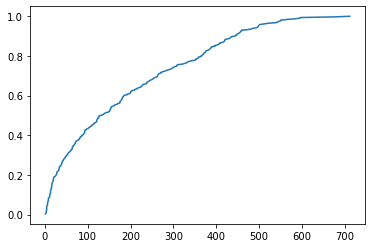

In [58]:
plt.plot(holiday['count'], holiday['holiday'].cumsum()/holiday['holiday'].sum(), label = 'holiday')
plt.plot(non_holiday['count'], non_holiday['holiday'].cumsum()/non_holiday['holiday'].sum(), label = 'non_holiday')